In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt


In [47]:
df = pd.read_csv('C:/Users/dbatists/machine-learning/datasets/kaggle/ab_nyc_2019.csv')

In [84]:
df.sample(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
28753,22214974,Brooklyn City Abode,160495098,Miller,Brooklyn,East Flatbush,40.63338,-73.94753,Private room,39,2,7,2018-12-06,0.50,5,0
12342,9528920,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Amy,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,2016-01-01,0.14,1,83
31678,24698043,Your Best NY location,14710145,Sabrina,Manhattan,East Village,40.72320,-73.98758,Private room,150,2,3,2018-05-28,0.21,1,0
37170,29539744,Amazing Bedroom in Brooklyn Him-1R-3,216235179,Nina,Brooklyn,Bushwick,40.70156,-73.91913,Private room,50,30,0,NaN,NaN,17,268
21066,16706758,Private midtown Apt w/ shared bath,10585694,Roy,Manhattan,Midtown,40.75369,-73.96679,Private room,99,2,21,2019-03-18,0.70,1,3
42011,32642131,Great Room in Manhattan - Close to Central Park,242594287,Thaweesab,Manhattan,Hell's Kitchen,40.76852,-73.98895,Private room,90,3,2,2019-03-31,0.48,1,66
45351,34687192,Sanctuary Studio in Long Island City,183818356,Sylvia,Queens,Astoria,40.75722,-73.92716,Entire home/apt,83,2,1,2019-06-04,0.86,1,16
2961,1717149,Corner High Rise Apartment - City Views,9053452,Liam,Manhattan,West Village,40.74035,-74.00615,Entire home/apt,440,3,6,2015-11-21,0.09,1,70
42323,32844588,Stylish Room w/ 2 Twin Beds in Times Square,244370442,Paramount Hotel,Manhattan,Theater District,40.76035,-73.98587,Private room,324,1,13,2019-06-18,5.42,7,331
11254,8729819,Spacious Room in East Willamsburg,3910533,Paolo,Brooklyn,Williamsburg,40.70696,-73.94349,Private room,90,2,1,2015-10-18,0.02,1,0


In [49]:
df.shape

(48895, 16)

In [50]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [51]:
def make_dashboard(x, gdp_change, unemployment, title, file_name):
    output_file(file_name)
    p = figure(title=title, x_axis_label='year', y_axis_label='%')
    p.line(x.squeeze(), gdp_change.squeeze(), color="firebrick", line_width=4, legend="% GDP change")
    p.line(x.squeeze(), unemployment.squeeze(), line_width=4, legend="% unemployed")
    show(p)

In [52]:
y = df['price']

In [53]:
X = df[['minimum_nights', 'availability_365']]

print('X === {0} e Y ===={1}'.format(X.shape[0], y.shape[0]))

X === 48895 e Y ====48895


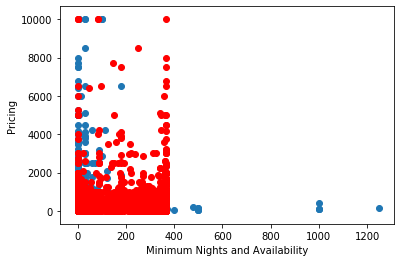

In [54]:
#fig, ax = plt.subplot()

plt.scatter(df['minimum_nights'], df['price'])
plt.scatter(df['availability_365'], df['price'], color='red')
plt.xlabel('Minimum Nights and Availability')
plt.ylabel('Pricing')
plt.show()
#df.plot(x='availability_365', y='price', ax=ax, secondary_y = True)

Text(0, 0.5, 'Pricing')

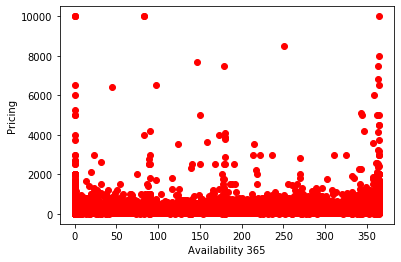

In [55]:
plt.scatter(df['availability_365'], df['price'], color='red')
plt.xlabel('Availability 365')
plt.ylabel('Pricing')

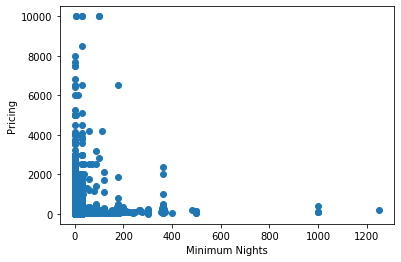

In [56]:
plt.scatter(df['minimum_nights'], df['price'])
plt.xlabel('Minimum Nights')
plt.ylabel('Pricing')
plt.show()

In [57]:
def featureScalling(x, mean, std):
    return (x - mean) / std

In [58]:
mean, std = np.mean(X), np.std(X)
X = featureScalling(X, mean, std)

In [59]:
m = len(y)
ones = np.ones((m, 1))
X = np.hstack((ones, X))
alpha = 0.01
num_iters = 400
theta = np.zeros((3, 1))
y = y[:, np.newaxis]

In [60]:
X.shape

(48895, 3)

In [61]:
y.shape

(48895, 1)

In [62]:
def computeCostMulti(X, y, theta):
    temp = np.dot(X, theta) - y
    return np.sum(np.power(temp, 2)) / (2*m)

J = computeCostMulti(X, y, theta)
print(J)

40498.226996625424


In [63]:
def gradientDescentMulti(X, y, theta, alpha, iterations):
    
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations, 3))

    for _ in range(iterations):
        temp = np.dot(X, theta) - y
        temp = np.dot(X.T, temp)
        theta = theta - (alpha / m) * temp
        
        cost_history[_] = computeCostMulti(X, y, theta)
        theta_history[_,:] = theta.T

    return theta, cost_history, theta_history

theta, cost_history, theta_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

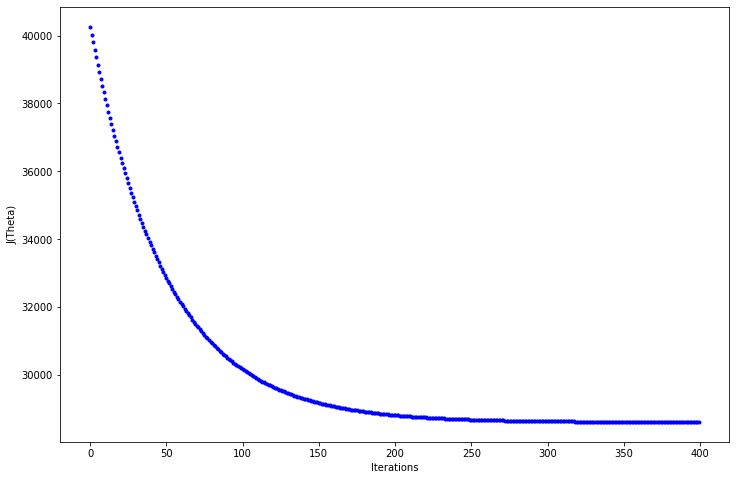

In [64]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(num_iters), cost_history,'b.')

In [65]:
J = computeCostMulti(X, y, theta)
J

28618.854216786276

In [66]:
y.shape

(48895, 1)

In [67]:
X.shape

(48895, 3)

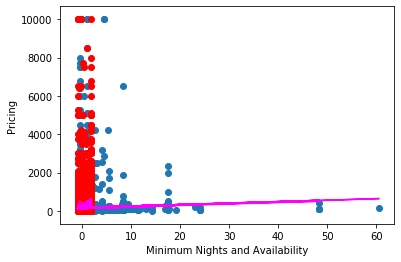

In [68]:
plt.scatter(X[:, 1:2], y)
plt.scatter(X[:, 2:3], y, color ='red')

plt.xlabel('Minimum Nights and Availability')
plt.ylabel('Pricing')

plt.plot(X[:,1:3], np.dot(X, theta), color='magenta')
plt.show()

In [69]:
theta

array([[149.97926636],
       [  7.64592874],
       [ 18.24747422]])

In [85]:
predict_example = np.array([30, 268])
predict_example = featureScalling(predict_example, mean, std)
ones = np.ones((1, ))
predict_example = np.hstack((ones, predict_example))

print(theta.T.dot(predict_example))

[180.06111365]


In [86]:
predict_example

array([1.        , 1.11992478, 1.17928552])